In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

# Set style for plots

sns.set_palette('pastel')

In [ ]:
# Load results from both models
user_based_metrics = pd.read_csv('C:/Users/Zenab/Desktop/inn assigment/res')
item_based_metrics = pd.read_csv('C:/Users/Zenab/Desktop/inn assigment/res')

# Load sample recommendations
user_recs = pd.read_csv('C:/Users/Zenab/Desktop/inn assigment/res')
item_recs = pd.read_csv('C:/Users/Zenab/Desktop/inn assigment/res')

In [15]:
# Create comparison table
metrics_comparison = pd.DataFrame({
    'Metric': ['RMSE', 'Precision@5', 'Recall@5'],
    'User-Based': [
        user_based_metrics.get('RMSE', [np.nan])[0],
        user_based_metrics.get('Precision@5', [np.nan])[0],
        user_based_metrics.get('Recall@5', [np.nan])[0]
    ],
    'Item-Based': [
        item_based_metrics.get('RMSE', [np.nan])[0],
        item_based_metrics.get('Precision@5', [np.nan])[0], 
        item_based_metrics.get('Recall@5', [np.nan])[0]
    ]
})

print("Performance Comparison:")
display(metrics_comparison)

Performance Comparison:


,Metric,User-Based,Item-Based
0,RMSE,NaN,NaN
1,Precision@5,NaN,NaN
2,Recall@5,NaN,NaN


<Figure size 1000x600 with 0 Axes>

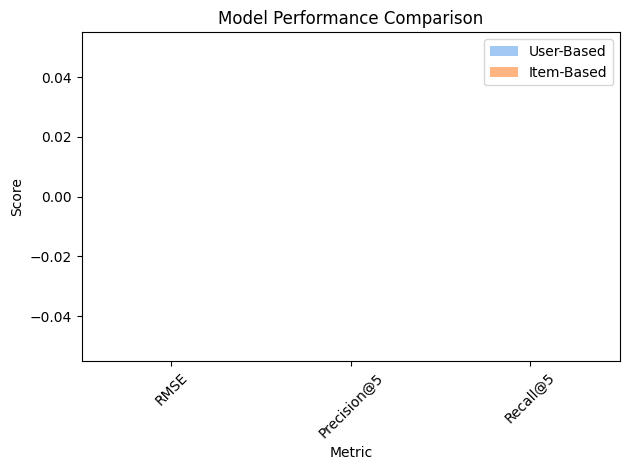

In [ ]:
plt.figure(figsize=(10, 6))
metrics_comparison.set_index('Metric').plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/metric_comparison.png')
plt.show()

In [ ]:
# Load movie metadata
try:
    movies = pd.read_csv('C:/Users/Zenab/Desktop/inn assigment', sep='|', encoding='latin-1', 
                        usecols=[0, 1], names=['item_id', 'title'])
    print("Successfully loaded movie metadata")
except FileNotFoundError:
    print("Error: Movie metadata file not found at 'data/u.item'")
    movies = pd.DataFrame(columns=['item_id', 'title'])


try:
    # Load user-based recommendations
    user_recs = pd.read_csv('C:/Users/Zenab/Desktop/inn assigment/res')
    
    # Load item-based recommendations
    item_recs = pd.read_csv('C:/Users/Zenab/Desktop/inn assigment/res')
    
    if 'item_id' in user_recs.columns and not 'title' in user_recs.columns:
        user_recs = user_recs.merge(movies, on='item_id', how='left')
    if 'item_id' in item_recs.columns and not 'title' in item_recs.columns:
        item_recs = item_recs.merge(movies, on='item_id', how='left')
        
    
    user_movie_col = 'title' if 'title' in user_recs.columns else user_recs.columns[0]
    item_movie_col = 'title' if 'title' in item_recs.columns else item_recs.columns[0]
    
    
    comparison_data = {
        'User-Based Recommendations': user_recs[user_movie_col].head(5),
        'Item-Based Recommendations': item_recs[item_movie_col].head(5)
    }
    
    # Add ratings if available
    if 'predicted_rating' in user_recs.columns:
        comparison_data['User-Based Rating'] = user_recs['predicted_rating'].head(5).round(2)
    if 'predicted_rating' in item_recs.columns:
        comparison_data['Item-Based Rating'] = item_recs['predicted_rating'].head(5).round(2)
    
    comparison_df = pd.DataFrame(comparison_data)
    
    print("\nTop 5 Recommendations Comparison:")
    display(comparison_df)
    
except FileNotFoundError as e:
    print(f"Error loading recommendation files: {e}")
    print("Please run the recommendation notebooks first")
except Exception as e:
    print(f"Unexpected error: {e}")
    print("User_recs columns:", list(user_recs.columns) if 'user_recs' in locals() else "Not loaded")
    print("Item_recs columns:", list(item_recs.columns) if 'item_recs' in locals() else "Not loaded")

Successfully loaded movie metadata
Error loading recommendation files: [Errno 2] No such file or directory: 'D:/Semester Four/Intelligent Programming/Project 2/results/item_based_recommendations.csv'
Please run the recommendation notebooks first
